# Universidad Politécnica Salesiana
# Yandry Romero
## Simulación del proceso de vacunación 

Para el proceso de vacunación vamos a ingresar varios datos de entrada como parámetros y así mismo vamos a definir paso a paso el proceso de la vacunación para poder obtener un análisis real sobre este proceso.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

In [3]:
NUM_VACUNAS = 100
NUM_JUNTAS = 10
NUM_PERSONAS = 3500
TIEMPO_SIMULACION = 340
NUM_PERSONAL = 5
NUM_REGISTRO = 2
NUM_E_CERTIFICADO = 2
INTERVALO = 0.00396
persona_vacunadas={}
persona_no_vacunadas={}
DATE_SECOND = datetime.now().strftime('%Y/%m/%d')

In [4]:
class vacunacion():
    def __init__(self, entorno,NUM_JUNTAS):
        self.entorno= entorno
        self.NUM_JUNTAS = simpy.Resource(entorno, NUM_JUNTAS)
    
    def llega_recinto(self,tiempo):
        yield self.entorno.timeout(tiempo)
        
    def llegada_mesa(self,tiempo):
        yield self.entorno.timeout(tiempo)
    
    def realiza_examen(self,tiempo):
        yield self.entorno.timeout(tiempo)
        
    def vacunacion_persona(self, tiempo):
        yield self.entorno.timeout(tiempo)
        
    def espera_sintomas(self,tiempo):
        yield self.entorno.timeout(tiempo)
        
    def espera_certificado(self,tiempo):
        yield self.entorno.timeout(tiempo)
        
    def segunda_dosis(self,tiempo):
        yield self.env.timeout(tiempo)
    
    def salir_recinto(self,tiempo):
        yield self.entorno.timeout(tiempo)
        
    def proceso_vacunacion(self, persona):
        print('La {} Llega al recinto {:,.6f}'.format(persona,self.entorno.now))
        espera = self.entorno.now
        with self.NUM_JUNTAS.request() as mesa:
            yield mesa
            tiempo_llegada = random.uniform(1,20)
            print('La {} Se traslada a la mesa {:,.6f}'.format(persona,self.entorno.now))
            yield self.entorno.process(self.llegada_mesa(tiempo_llegada))
            print('La {} Se traslada a la mesa {:,.6f}'.format(persona,self.entorno.now))
            tiempo_espera = self.entorno.now - espera
            tiempo_examen = 20
            yield self.entorno.process(self.realiza_examen(tiempo_examen))
            print('La {} Se realizo revision medica {:,.6f}'.format(persona,self.entorno.now))
            print('La {} Se traslada a vacunacion {:,.6f}'.format(persona,self.entorno.now))
            tiempo_vacuna = random.randint(5,10)
            yield self.entorno.process(self.vacunacion_persona(tiempo_vacuna))
            print('La {} Se termino de vacunar {:,.6f}'.format(persona,self.entorno.now))
            tiempo_espera_sintomas = 1.2
            print('La {} Se termino tiempo de reposo {:,.6f}'.format(persona,self.entorno.now))
            yield self.entorno.process(self.espera_sintomas(tiempo_espera_sintomas))
            tiempo_certificado = random.randint(1, 5)
            yield self.entorno.process(self.espera_certificado(tiempo_certificado))
            print('La {} Se Entrego el certificado {:,.6f}'.format(persona,self.entorno.now))
            tiempo_salir= random.randint(1,5)
            segunda = datetime.strftime(datetime.strptime(DATE_SECOND, '%Y/%m/%d')+dt.timedelta(days=21), '%Y/%m/%d')
            print('A la {} se asigna la siguiente dosis {}'.format(persona,segunda))
            yield self.entorno.process(self.salir_recinto(tiempo_salir))
            print('La {} Se termino el proceso {:,.6f}'.format(persona,self.entorno.now))
            
class Simulacion():

    def __init__(self,NUM_VACUNAS):
        self.NUM_VACUNAS = NUM_VACUNAS
        self.nombre_persona = 'persona_{}'
        

    def ejecutar_simulacion(self,entorno,INTERVALO,NUM_JUNTAS):
        vacun = vacunacion(entorno, NUM_JUNTAS)
        self.iniciar_persona(entorno, vacun)

        while True:
            if(entorno.now<0.33):
                estado = random.randint(1,100)
                if (estado < 10) :
                    persona_no_vacunadas[entorno.now] = persona_no_vacunadas[entorno.now] + 1 if entorno.now in persona_no_vacunadas else  1
                else:
                    persona_vacunadas[entorno.now] = persona_vacunadas[entorno.now] + 1 if entorno.now in persona_vacunadas else 1
                    yield entorno.timeout(random.uniform(INTERVALO-0.00132,INTERVALO+0.00132))
                    self.NUM_VACUNAS+=1
                    yield entorno.process(vacun.proceso_vacunacion(self.nombre_persona.format(self.NUM_VACUNAS)))
                 
            if(entorno.now<31):
                 yield entorno.timeout(random.uniform(INTERVALO-0.00132,INTERVALO+0.00132))


    def iniciar_persona(self,entorno,procVacu):
        for i in range(self.NUM_VACUNAS):
            estado = random.randint(1,100)
            if (estado < 10) :
                persona_no_vacunadas[entorno.now] = persona_no_vacunadas[entorno.now] + 1 if entorno.now in persona_no_vacunadas else  1
            else:
                persona_vacunadas[entorno.now] = persona_vacunadas[entorno.now] + 1 if entorno.now in persona_vacunadas else 1
                entorno.process(procVacu.proceso_vacunacion(self.nombre_persona.format(i)))

In [5]:
entorno = simpy.Environment()
simulacion = Simulacion(NUM_VACUNAS)
entorno.process(simulacion.ejecutar_simulacion(entorno, NUM_JUNTAS, INTERVALO))
entorno.run(until=TIEMPO_SIMULACION)

La persona_0 Llega al recinto 0.000000
La persona_1 Llega al recinto 0.000000
La persona_2 Llega al recinto 0.000000
La persona_3 Llega al recinto 0.000000
La persona_4 Llega al recinto 0.000000
La persona_5 Llega al recinto 0.000000
La persona_6 Llega al recinto 0.000000
La persona_7 Llega al recinto 0.000000
La persona_8 Llega al recinto 0.000000
La persona_9 Llega al recinto 0.000000
La persona_10 Llega al recinto 0.000000
La persona_11 Llega al recinto 0.000000
La persona_12 Llega al recinto 0.000000
La persona_13 Llega al recinto 0.000000
La persona_16 Llega al recinto 0.000000
La persona_17 Llega al recinto 0.000000
La persona_18 Llega al recinto 0.000000
La persona_19 Llega al recinto 0.000000
La persona_20 Llega al recinto 0.000000
La persona_21 Llega al recinto 0.000000
La persona_22 Llega al recinto 0.000000
La persona_23 Llega al recinto 0.000000
La persona_25 Llega al recinto 0.000000
La persona_26 Llega al recinto 0.000000
La persona_27 Llega al recinto 0.000000
La persona

In [6]:
print("Personas Vacunadas: ")
print(persona_vacunadas)
print("`Personas No Vacunadas: ")
print(persona_no_vacunadas)

Personas Vacunadas: 
{0: 92}
`Personas No Vacunadas: 
{0: 9}


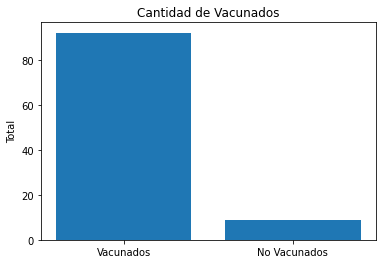

In [7]:
datosNo=sorted(persona_no_vacunadas.items()) # Ordenamos los datos
xn, yn =zip(*datosNo)
datos=sorted(persona_vacunadas.items()) # Ordenamos los datos
x, y =zip(*datos)
personas = ['Vacunados', 'No Vacunados']
cantidad = [sum(y),sum(yn)]
fig, ax = plt.subplots()
ax.set_ylabel('Total')
ax.set_title('Cantidad de Vacunados')
plt.bar(personas, cantidad)
plt.show()

In [8]:
total= sum(y)+sum(yn)
print("Total de personas vacunadas: ",total)

Total de personas vacunadas:  101


Conclusión

Como se puede evidenciar el proceso de vacunación es muy rapido por lo cual solo pocas personas por diferentes problemas de salud o por problemas de ir a la vacunación y no decidirse en vacunar existe un baja tasa de personas que no se realzian la vacunación de la primera y segunda dosis.